In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run ../utils/parseData.py
from sklearn.preprocessing import StandardScaler

In [35]:
dataset = ReadData("../data/")

df = pd.DataFrame(dataset)
df = df.rename(columns={ df.columns[0]: "gesture" })

df

,gesture,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,122.989521,5.031775,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,5.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,126.284136,10.933279,...,-84.465314,-101.813423,-40.555092,-74.267011,-88.874181,-33.688779,-68.891507,67.960503,37.844303,106.596725
376,5.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,123.119276,5.285622,...,-84.698626,-103.643026,-48.000014,-72.690766,-88.437862,-35.001295,-70.236169,68.232502,34.305546,104.609253
377,4.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,148.736027,33.090179,...,90.628198,-101.577734,-35.492179,-73.633540,-85.879244,-23.011290,-70.413436,73.377557,4.648314,110.603361
378,7.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,149.019953,33.246508,...,103.415909,-101.373713,-32.576063,-70.264926,-88.666529,-47.489268,-68.730335,-76.476354,-46.016645,-71.185372


In [77]:
x = dataset[:, 2:]
y = dataset[:, :1]

x = pd.DataFrame(x)
y = pd.DataFrame(y, columns=['gesture'])

x

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,90.0,0.0,90.0,90.0,0.0,90.0,122.989521,5.031775,32.396511,154.947733,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,47.132208,171.382518,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,54.489470,-178.385441,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,53.670653,-179.465062,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,32.581669,155.111402,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,90.0,0.0,90.0,90.0,0.0,90.0,126.284136,10.933279,36.509585,159.832867,...,-84.465314,-101.813423,-40.555092,-74.267011,-88.874181,-33.688779,-68.891507,67.960503,37.844303,106.596725
376,90.0,0.0,90.0,90.0,0.0,90.0,123.119276,5.285622,32.562380,155.374277,...,-84.698626,-103.643026,-48.000014,-72.690766,-88.437862,-35.001295,-70.236169,68.232502,34.305546,104.609253
377,90.0,0.0,90.0,90.0,0.0,90.0,148.736027,33.090179,62.008317,-169.602029,...,90.628198,-101.577734,-35.492179,-73.633540,-85.879244,-23.011290,-70.413436,73.377557,4.648314,110.603361
378,90.0,0.0,90.0,90.0,0.0,90.0,149.019953,33.246508,62.317644,-169.710133,...,103.415909,-101.373713,-32.576063,-70.264926,-88.666529,-47.489268,-68.730335,-76.476354,-46.016645,-71.185372


In [42]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.0,0.0,0.0,0.0,0.0,-1.314767,-1.489233,-1.337832,0.808434,...,-0.570070,-1.038508,-1.586460,-0.568394,-0.643434,-1.655448,-0.483624,-0.663299,-1.466939,-0.942909
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.133793,0.113911,-0.105737,0.907857,...,-0.977802,1.229241,1.022256,1.194013,1.979884,0.935145,1.963508,1.413021,0.430606,1.362225
2,0.0,0.0,0.0,0.0,0.0,0.0,0.493344,0.643127,0.509425,-1.208086,...,-1.050533,1.219201,1.656133,1.182559,1.947278,1.464849,1.943177,1.423086,0.464228,1.429544
3,0.0,0.0,0.0,0.0,0.0,0.0,0.422779,0.591331,0.440961,-1.214617,...,-1.003452,1.236365,0.797076,1.179065,1.992275,0.706414,2.008068,1.424860,0.204031,1.413553
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.300909,-1.463618,-1.322350,0.809424,...,-0.558195,-1.025288,-1.573618,-0.580029,-0.605131,-1.472943,-0.522101,-0.700960,-1.383739,-0.929685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.0,0.0,0.0,0.0,0.0,0.0,-0.999610,-0.955635,-0.993926,0.837987,...,-0.765152,-0.782324,-0.640979,-0.860647,-0.528058,-0.250110,-0.498472,1.348827,1.632596,1.385891
376,0.0,0.0,0.0,0.0,0.0,0.0,-1.302355,-1.466281,-1.323963,0.811014,...,-0.767848,-0.802223,-0.861762,-0.840973,-0.521531,-0.290140,-0.519238,1.352771,1.531821,1.362028
377,0.0,0.0,0.0,0.0,0.0,0.0,1.148099,1.047729,1.138097,-1.154950,...,1.258106,-0.779760,-0.490835,-0.852740,-0.483259,0.075538,-0.521976,1.427388,0.687257,1.433998
378,0.0,0.0,0.0,0.0,0.0,0.0,1.175259,1.061864,1.163961,-1.155604,...,1.405872,-0.777541,-0.404356,-0.810694,-0.524952,-0.671006,-0.495983,-0.745897,-0.755556,-0.748685


In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1',
                                                              'principal component 2',
                                                              'principal component 3'])

# principalDF = pd.DataFrame(data=principalComponents)
principalDF

,principal component 1,principal component 2,principal component 3
0,498.196527,-15.666427,-70.916667
1,-322.848310,515.732744,-13.765520
2,-425.459893,396.827390,25.034301
3,-419.066124,387.366742,27.270657
4,502.032523,-16.751781,-73.914821
...,...,...,...
375,378.264880,197.550457,239.213493
376,374.727373,194.029247,238.426875
377,-269.362073,-204.392240,396.870081
378,-187.789294,-402.646400,100.637137


In [87]:
finalDf = pd.concat([principalDF, df[['gesture']]], axis=1)

finalDf

,principal component 1,principal component 2,principal component 3,gesture
0,498.196527,-15.666427,-70.916667,0.0
1,-322.848310,515.732744,-13.765520,2.0
2,-425.459893,396.827390,25.034301,2.0
3,-419.066124,387.366742,27.270657,2.0
4,502.032523,-16.751781,-73.914821,0.0
...,...,...,...,...
375,378.264880,197.550457,239.213493,5.0
376,374.727373,194.029247,238.426875,5.0
377,-269.362073,-204.392240,396.870081,4.0
378,-187.789294,-402.646400,100.637137,7.0


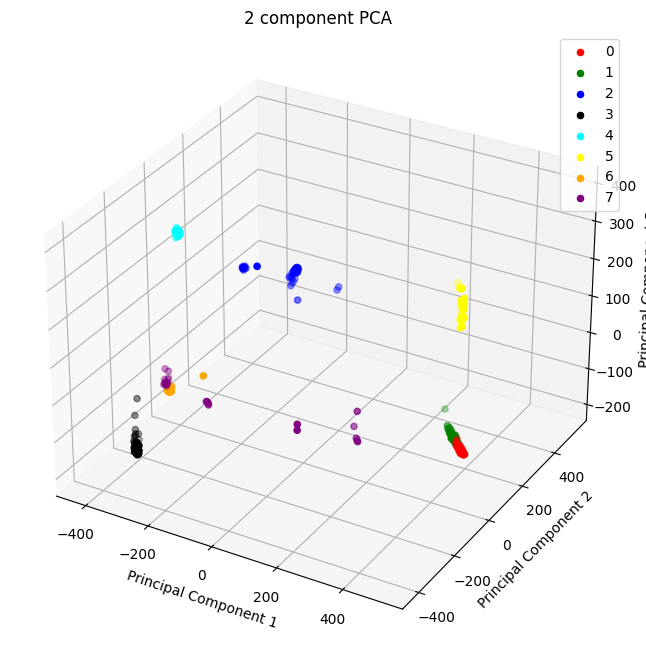

In [88]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, projection="3d")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('2 component PCA')

targets = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['r', 'g', 'b', 'black', 'cyan', 'yellow', 'orange', 'purple']

for target, color in zip(targets, colors):
    indexes = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indexes, 'principal component 1'],
               finalDf.loc[indexes, 'principal component 2'],
               finalDf.loc[indexes, 'principal component 3'],
               c = color)
    
ax.legend(targets)

ax.grid()

In [89]:
pca.explained_variance_, pca.explained_variance_.size, pca.explained_variance_.sum()

(array([143907.60020923,  90385.61694866,  23904.08794784]),
 3,
 258197.30510573034)